In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Read the institutions.csv file
inst = "/Users/nt/Desktop/DS2500/institutions.csv"
read_inst = pd.read_csv(inst, low_memory=False)

# Read the banklist.csv file
bank = "/Users/nt/Desktop/DS2500/banklist.csv"
read_bank = pd.read_csv(bank, encoding='cp1252')

In [18]:
# Create an empty list for the failures 
failure_list = []

# Check if each CERT value in read_inst exists in read_bank's CERT column
for i in read_inst['CERT']:
    if i in read_bank['Cert '].values:
        failure_list.append(1)
    else:
        failure_list.append(0)

# Create a new column 'failure' using the 'failure_list'
read_inst['failure'] = failure_list
        

In [19]:
# Create a list of features to use
features = ["ASSET", "DEP", "DEPDOM", "NETINC", "OFFDOM", "ROA", "ROAPTX", "ROE", "CERT", "failure"]
read_inst = read_inst[features]
read_inst = read_inst.dropna()

In [20]:
# Normalizing the data
for cols in features:
    if cols !="CERT":
        read_inst[cols] = (read_inst[cols] - read_inst[cols].min()) / (read_inst[cols].max() - read_inst[cols].min())

X = read_inst.drop(["CERT","failure"],axis = 1)
y = read_inst["failure"]

In [21]:
# Empty list for the accuracy, precision, and recall scores
acc = []
pre = []
recall = []

# Splitting the data to train and test it
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

# Loops through k values to evaluate K-neartest Neighbors
# Makes a Kfold cross validator
for k in range(4,19):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    kf = KFold(n_splits= 4, random_state= 0, shuffle= True)
    
# Calculating the accuracy, precision, and recall scores using cross validation
    acc_score = cross_val_score(knn, X, y, cv=kf, scoring= "accuracy")
    acc.append(acc_score.mean())
    pre_score = cross_val_score(knn, X, y, cv=kf, scoring="precision")
    pre.append(pre_score.mean())
    recall_score = cross_val_score(knn, X, y, cv=kf, scoring="recall")
    recall.append(recall_score.mean())

In [22]:
# Returns the k value for the maximum accuracy, precision, and recall scores
optimal_acc = acc.index(max(acc))+4
optimal_pre = pre.index(max(pre))+4
optimal_recall = recall.index(max(recall))+4

In [23]:
# prints them out 
optimal_acc, optimal_pre, optimal_recall

(12, 18, 5)

In [24]:
# Calculating lowest mean accuracy 
low = min(acc)
low

0.9766552525420894

In [25]:
# Create a KNeighborsClassifier with the optimal number of neighbors
optimal_knn = KNeighborsClassifier(n_neighbors=optimal_acc)

# Fit the model on the entire dataset
optimal_knn.fit(X_train, y_train)

# Predict the labels for the entire dataset
y_pred = optimal_knn.predict(X_test)

# Calculate the F1 score for the class of banks that failed (class 1)
f1_score_failed = f1_score(y_test, y_pred, pos_label=1)

print("F1 score for the banks that failed:", f1_score_failed)

F1 score for the banks that failed: 0.26993865030674846


In [26]:
#Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract True Negatives (TN)
tn = conf_matrix[0, 0]

print("Number of True Negatives (Predicted NOT fail and DID NOT fail):", tn)

Number of True Negatives (Predicted NOT fail and DID NOT fail): 5814


Text(0.5, 1.0, 'Banks Failed VS Passed')

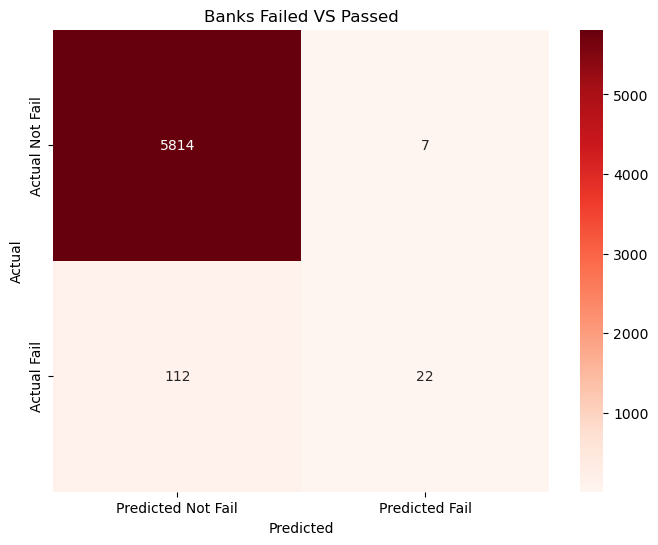

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", 
            xticklabels=["Predicted Not Fail", "Predicted Fail"],
            yticklabels=["Actual Not Fail", "Actual Fail"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Banks Failed VS Passed")

In [37]:
# Define the range of k values to test
k_values = np.arange(4, 19)
accuracy_scores = []
precision_scores = []
recall_scores = []

# Loop through different k values and calculate scores
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Calculate accuracy, precision, and recall scores using cross-validation
    accuracy = cross_val_score(knn, X, y, cv=4, scoring="accuracy").mean()
    precision = cross_val_score(knn, X, y, cv=4, scoring="precision").mean()
    recall = cross_val_score(knn, X, y, cv=4, scoring="recall").mean()
    
    # Append calculated scores to their lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

Text(0, 0.5, 'Recall')

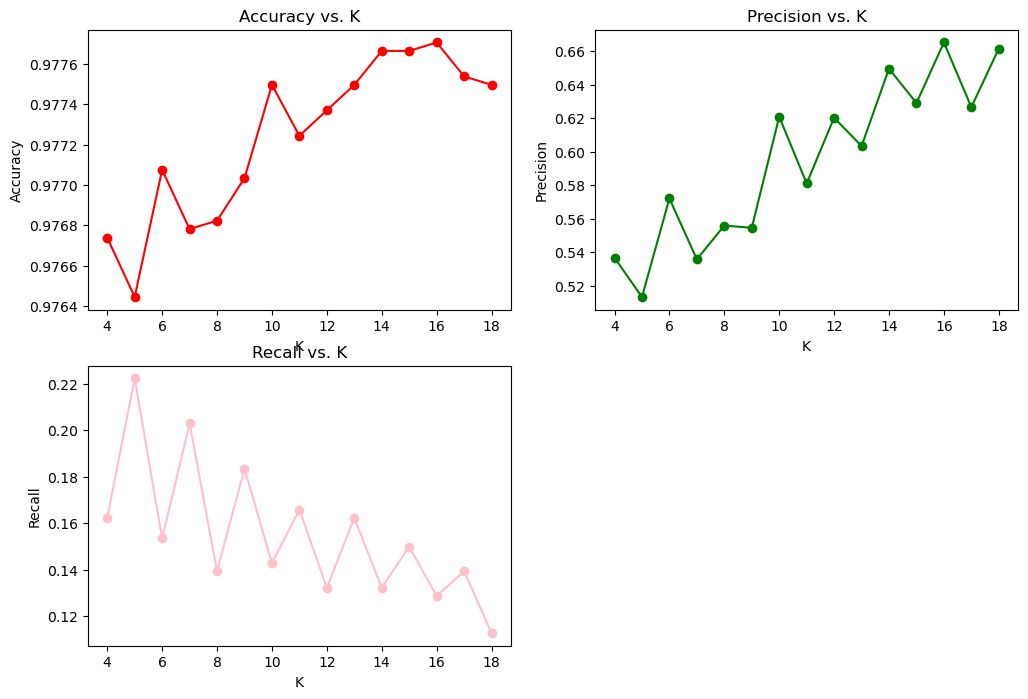

In [36]:
# Creates subplots for accuracy, precision, and recall
plt.figure(figsize=(12, 8))

# Plot the Accuracy vs. k
plt.subplot(2, 2, 1)
plt.plot(k_values, accuracy_scores, marker= "o", linestyle= "-", color= "red")
plt.title("Accuracy vs. K")
plt.xlabel("K")
plt.ylabel("Accuracy")

# Plot the Precision vs. k
plt.subplot(2, 2, 2)
plt.plot(k_values, precision_scores, marker= "o", linestyle= "-", color= "green")
plt.title("Precision vs. K")
plt.xlabel("K")
plt.ylabel("Precision")

# Plot the Recall vs. k
plt.subplot(2, 2, 3)
plt.plot(k_values, recall_scores, marker= "o", linestyle= "-", color= "pink")
plt.title("Recall vs. K")
plt.xlabel("K")
plt.ylabel("Recall")    

In [30]:
# Find the row in read_bank containing 'Southern Community Bank'
southern_bank_row = read_bank[read_bank['Bank Name'].str.contains('Southern Community Bank')]

if not southern_bank_row.empty:
    # Extract CERT value for Southern Community Bank
    cert_southern_community = southern_bank_row.iloc[0]['Cert ']

    # Check if the CERT value exists in read_inst
    if cert_southern_community in read_inst['CERT'].values:
        # Get features for prediction
        # drop cert and failure as tehre nto needed to make the prediction 
        features_to_predict = read_inst[read_inst['CERT'] == cert_southern_community].drop(["CERT", "failure"], axis=1)
        
        # Use the trained model to predict failure
        prediction = optimal_knn.predict(features_to_predict)
        
        # Print the prediction
    if prediction == 1:
        print("The model predicts Southern Community Bank of Fayetteville, GA will failure.")
    else:
        print("The model predicts Southern Community Bank of Fayetteville, GA will not failure.")

The model predicts Southern Community Bank of Fayetteville, GA will failure.
